<a href="https://colab.research.google.com/github/YasanthiClair/stockM_pre/blob/main/stockM_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

# Define the stock symbol and the time range
stock_symbol = 'AAPL'  # Example: Apple stock
start_date = '2010-01-01'
end_date = '2024-01-01'

# Download stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display first few rows of the data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440330  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451466  6.487879  6.417460  6.458087  601904800
2010-01-06  6.348846  6.477045  6.342226  6.451466  552160000
2010-01-07  6.337111  6.379845  6.291068  6.372321  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


In [ ]:
# Create Moving Averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# Drop rows with missing values (first 200 rows will have NaN)
data.dropna(inplace=True)

# Display first few rows to check
print(data[['Close', '50_MA', '200_MA']].head())


Price          Close     50_MA    200_MA
Ticker          AAPL                    
Date                                    
2010-10-18  9.569767  8.139174  7.387423
2010-10-19  9.313669  8.167908  7.401790
2010-10-20  9.344965  8.198676  7.416257
2010-10-21  9.314569  8.234385  7.431086
2010-10-22  9.252876  8.267897  7.445665


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Select features and target
features = data[['50_MA', '200_MA']]  # Features
target = data['Close']  # Target variable

# Fit the scaler to features and target
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, shuffle=False)

# Check the shape of the split data
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (2658, 2), Testing set: (665, 2)


Mean Absolute Error: 0.04444193895985608


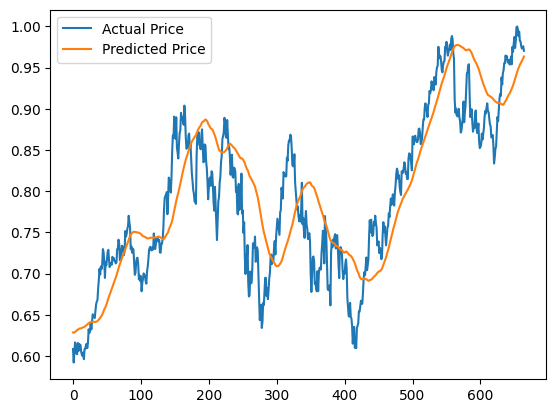

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Plot the predicted vs actual prices
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.show()
